In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

data_folder = './data'
data_file = 'cleaned_data.parquet'


In [25]:
#read data
cars_data = pd.read_parquet(os.path.join(data_folder, data_file))

numerical_columns = ['price', 'year', 'yearSquared', 'odometer', 'logOdometer', 'cylinders']
categorical_columns = cars_data.columns[6:]

Index(['manufacturer_acura', 'manufacturer_alfa-romeo',
       'manufacturer_aston-martin', 'manufacturer_audi', 'manufacturer_bmw',
       'manufacturer_buick', 'manufacturer_cadillac', 'manufacturer_chevrolet',
       'manufacturer_chrysler', 'manufacturer_datsun',
       ...
       'paint_color_custom', 'paint_color_green', 'paint_color_grey',
       'paint_color_orange', 'paint_color_purple', 'paint_color_red',
       'paint_color_silver', 'paint_color_white', 'paint_color_yellow',
       'paint_color_None'],
      dtype='object', length=103)


In [24]:
cars_data[numerical_columns].iloc[:100].shape

(100, 6)

AttributeError: module 'numpy' has no attribute 'iterable'

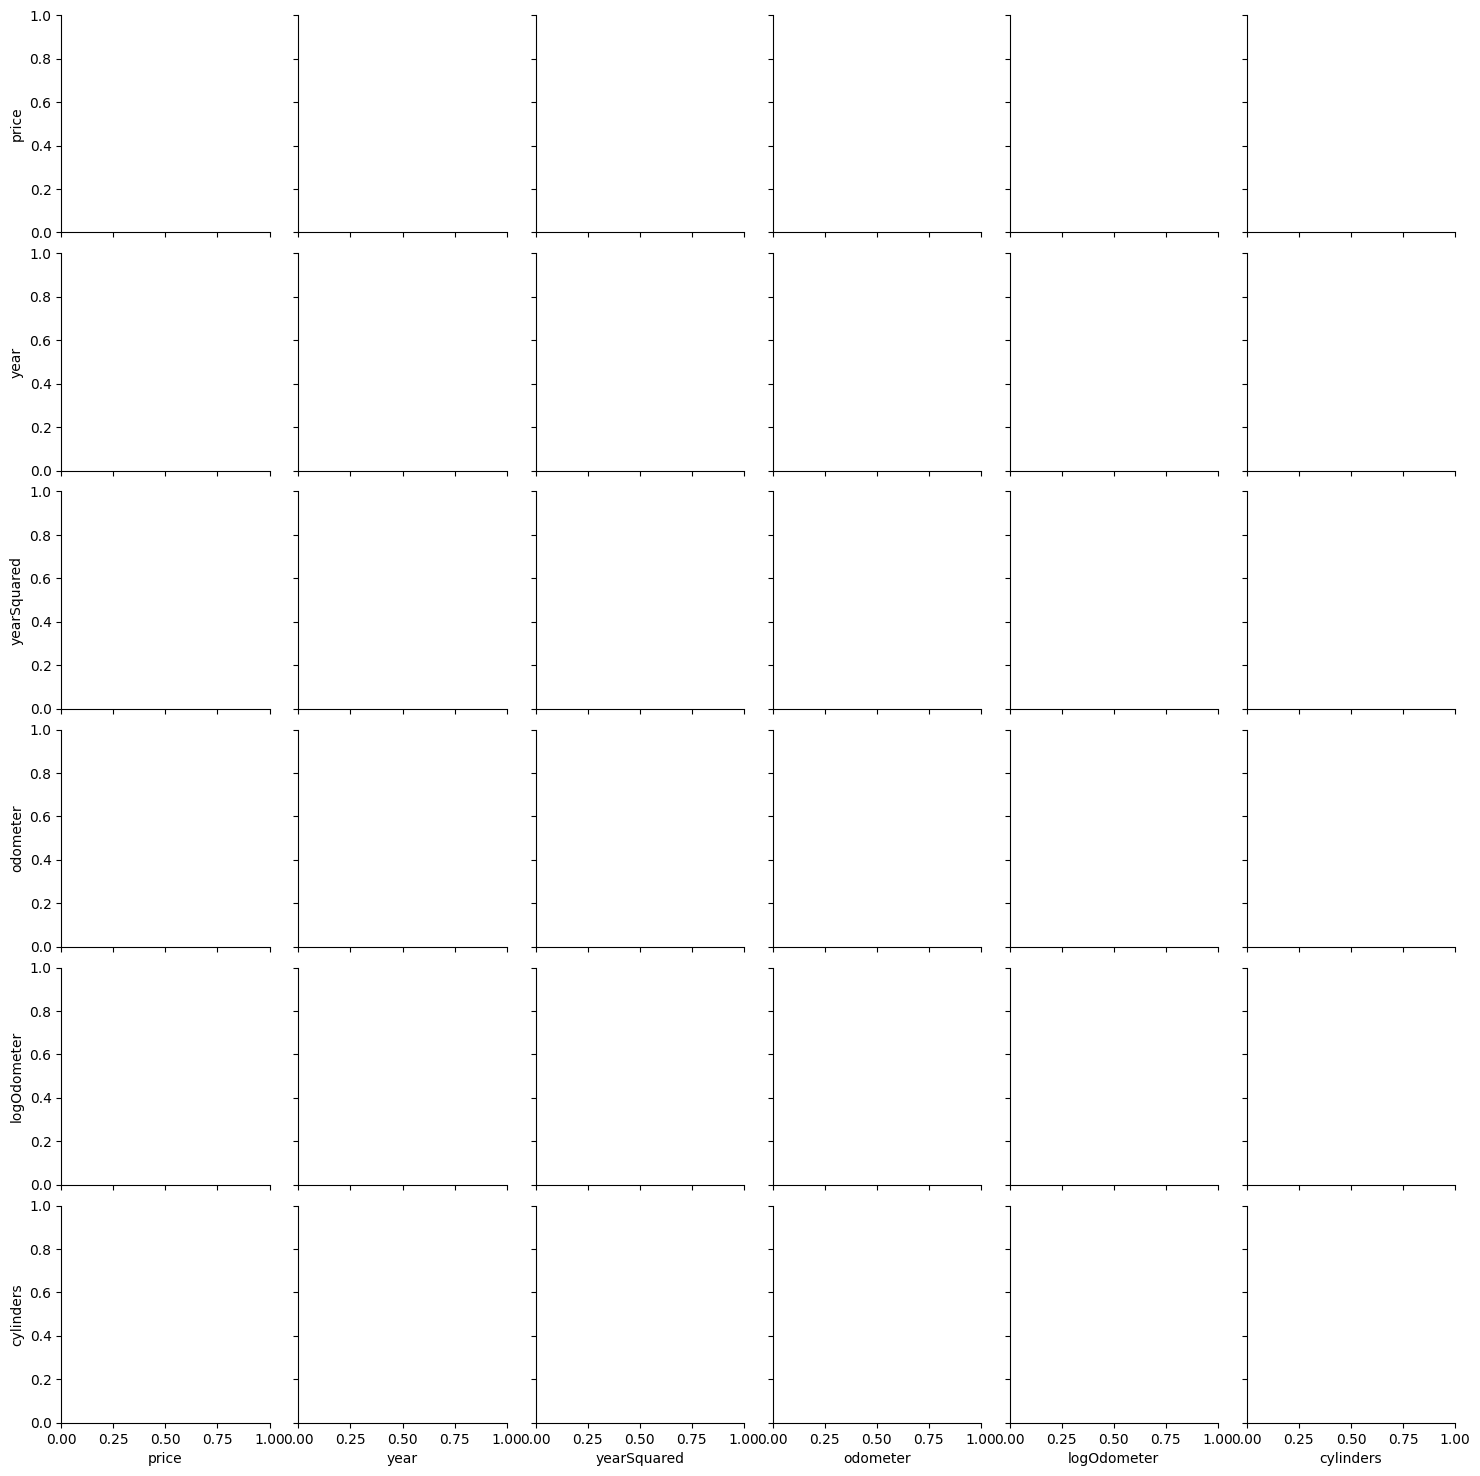

In [20]:
sns.pairplot(cars_data[numerical_columns].iloc[:100])
plt.show()

In [21]:
sns.set_theme(style="whitegrid")

# Load the brain networks dataset, select subset, and collapse the multi-index
df = cars_data[['price'].append(categorical_columns)]


# Compute a correlation matrix and convert to long-form
corr_mat = df.corr()

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

KeyError: "None of [Index(['manufacturer', 'condition', 'fuel', 'title_status', 'transmission',\n       'drive', 'size', 'type', 'paint_color'],\n      dtype='object')] are in the [columns]"